In [39]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

SchoolProfile_filename = '../../SchoolData/data_2013_school_profile.csv'
data = pd.read_csv(SchoolProfile_filename)

SchoolGrad_Absences_filename = '../../SchoolData/data_2013_School-Attendance-and-Graduation.csv'
SchoolGrad_Absences_data = pd.read_csv(SchoolGrad_Absences_filename)

In [40]:
dataFields = data.columns.values.tolist()
dataFields

['YEAR',
 'DISTRICT',
 'DISTRICT_NAME',
 'SCHOOL_ID',
 'SCHOOL NAME',
 'GRADES_SERVED',
 'SAFE SCHOOL',
 'Average Daily Membership',
 'TOTAL',
 'WHITE',
 'AFRICAN_AMERICAN',
 'HISPANIC',
 'Asian',
 'Native American',
 'Male',
 'Female',
 'WHITE_PCT',
 'African American PCT',
 'Hispanic PCT',
 'Asian PCT',
 'Native American PCT',
 'Male PCT',
 'Female PCT',
 'White Male',
 'African American Male',
 'Hispanic Male',
 'Asian Male',
 'Native American Male',
 'White Female',
 'African American Female',
 'Hispanic Female',
 'Asian Female',
 'Native American Female',
 'Limited English Proficient PCT',
 'LIMITED_ENGLISH_PROFICIENT',
 'Number Exempt from Reading Assessment',
 'STUDENTS_WITH_DISABILITIES',
 'STUDENTS_WITH_DISABILITIES_PCT',
 'Free eligible',
 'Reduced eligible',
 'ECONOMICALLY_DISADVANTAGED',
 'Free PCT',
 'Reduced PCT',
 'ECONOMICALLY_DISADVANTAGED_PCT',
 'Title I',
 'Title I PCT']

In [41]:
dataFields = SchoolGrad_Absences_data.columns.values.tolist()
dataFields

['SCHOOL YEAR',
 'District',
 'District Name',
 'SCHOOL_ID',
 'SCHOOL NAME',
 'K-8 Attendance Rate %',
 'K-8 Promotion Rate %',
 'State Goal Attendance Rate',
 'State Goal Promotion Rate',
 'Attendance Rate %',
 'Cohort Dropout  %',
 'Graduation Rate NCLB %',
 'Event Dropout %',
 'All_grad_rate',
 'White grad rate',
 'African American grad rate',
 'Hispanic grad rate',
 'Asian grad rate',
 'Native American grad rate',
 'Male grad rate',
 'Female grad rate',
 'Economically Disadvantaged grad rate',
 'Students with Disabilities grad rate',
 'Limited English Proficient grad rate']

In [42]:
JoinedData = data.merge(SchoolGrad_Absences_data, left_on=['SCHOOL_ID','DISTRICT'], right_on=['SCHOOL_ID','DISTRICT'])

JoinedData['ALL_GRAD_COUNT'] = JoinedData['ALL_GRAD_RATE']*JoinedData['TOTAL']/100

School_Profile_Groups = []

#JoinedData[['SCHOOL_NAME_x','SCHOOL_NAME_y']]


In [43]:
JoinedDataFields = JoinedData.columns.values.tolist()
#JoinedDataFields
#set(JoinedData.GRADES_SERVED)
#JoinedData.groupby(['GRADES_SERVED']).get_group('Grades 9-12').TOTAL.sum()
#JoinedData.query('GRADES_SERVED == "Grades 9-12"').TOTAL.sum()

In [44]:
def printSummary(query, label):
    student_count = 0
    white_student_count = 0
    black_student_count = 0
    hispanic_student_count = 0
    disabled_student_count = 0
    economically_disadvantaged_student_count = 0
    limited_english_proficiency_student_count = 0
    graduate_count = 0
    label_no_spaces = label.replace(' ', '_')
    
    gb = JoinedData.query(query)
    student_count = gb.TOTAL.sum()
    white_student_count = gb.WHITE.sum()
    black_student_count = gb.AFRICAN_AMERICAN.sum()
    hispanic_student_count = gb.HISPANIC.sum()
    disabled_student_count = gb.STUDENTS_WITH_DISABILITIES.sum()
    economically_disadvantaged_student_count = gb.ECONOMICALLY_DISADVANTAGED.sum()
    limited_english_proficiency_student_count = gb.LIMITED_ENGLISH_PROFICIENT.sum()
    graduate_count = gb.ALL_GRAD_COUNT.sum()
    graduation_pct = 0
    if student_count != 0:
        graduation_pct = (graduate_count/student_count)*100           
    School_Profile_Groups.append({'name': label_no_spaces, 
                                  'students': student_count, 
                                  'white_students': white_student_count, 
                                  'black_students': black_student_count, 
                                  'hispanic_students': hispanic_student_count, 
                                  'disabled_students': disabled_student_count, 
                                  'economically_disadvantaged_students': economically_disadvantaged_student_count, 
                                  'limited_english_proficiency_students': limited_english_proficiency_student_count, 
                                  'graduation_pct': graduation_pct})

    print(label)
    print('All Students: ' + str(int(student_count)))
    print('White Students: ' + str(int(white_student_count)))
    print('Black Students: ' + str(int(black_student_count)))
    print('Hispanic Students: ' + str(int(hispanic_student_count)))

    print('Students with Disabilities: ' + str(int(disabled_student_count)))
    print('Economically Disadvantaged Students: ' + str(int(economically_disadvantaged_student_count)))
    print('Students with Limited English Proficiency: ' + str(int(limited_english_proficiency_student_count)))
    print('Student Graduation percentage: ' + str(int(graduation_pct)))
    print('Query used:', query)

In [45]:
JoinedData.query('GRADES_SERVED == "Grades 9-12"')

,YEAR,DISTRICT,DISTRICT_NAME,SCHOOL_ID,SCHOOL NAME_x,GRADES_SERVED,SAFE SCHOOL,Average Daily Membership,TOTAL,WHITE,...,African American grad rate,Hispanic grad rate,Asian grad rate,Native American grad rate,Male grad rate,Female grad rate,Economically Disadvantaged grad rate,Students with Disabilities grad rate,Limited English Proficient grad rate,All_Grad_Count
0,2013,10,Anderson County,2,Anderson County High School,Grades 9-12,Safe School,1004.0,1030.0,1014.0,...,NaN,NaN,NaN,NaN,91.0,96.1,90.8,76.7,NaN,959.960
1,2013,10,Anderson County,3,Anderson County Career Technical Center,Grades 9-12,Safe School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,10,Anderson County,25,Clinton High School,Grades 9-12,Safe School,1140.0,1170.0,1119.0,...,NaN,NaN,NaN,NaN,87.8,91.7,84.2,74.4,NaN,1050.660
23,2013,12,Oak Ridge,35,Oak Ridge High School,Grades 9-12,Safe School,1314.0,1346.0,1002.0,...,87.3,81.3,93.3,NaN,85.1,85.9,78.4,73.3,NaN,1149.484
28,2013,20,Bedford County,13,Cascade High School,Grades 9-12,Safe School,523.0,529.0,479.0,...,NaN,NaN,NaN,NaN,84.4,95.2,84.4,68.2,NaN,475.042
31,2013,20,Bedford County,20,Shelbyville Central High School,Grades 9-12,Safe School,1231.0,1255.0,807.0,...,95.3,94.9,NaN,NaN,87.3,91.9,86.2,68.6,81.8,1125.735
34,2013,20,Bedford County,35,Community High School,Grades 9-12,Safe School,466.0,477.0,433.0,...,NaN,NaN,NaN,NaN,82.9,91.9,82.2,57.7,NaN,414.990
41,2013,30,Benton County,4,Benton Co Adult High School,Grades 9-12,Safe School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2013,30,Benton County,9,Benton County Career / Technical Center,Grades 9-12,Safe School,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2013,30,Benton County,25,Camden Central High School,Grades 9-12,Safe School,564.0,583.0,544.0,...,NaN,NaN,NaN,NaN,87.7,90.4,85.9,95.0,NaN,518.870


In [46]:
printSummary('GRADES_SERVED == "Grades 9-12"', 'All TN High Schools')

All TN High Schools
All Students: 254457
White Students: 171282
Black Students: 63164
Hispanic Students: 13776
Students with Disabilities: 28765
Economically Disadvantaged Students: 130264
Students with Limited English Proficiency: 4407
Student Graduation percentage: 86
Query used: GRADES_SERVED == "Grades 9-12"


In [47]:
def printHSSummary(query, label):
    printSummary(query + " and GRADES_SERVED == 'Grades 9-12'", label)
    
printHSSummary("DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County')", 
             'TN Urban High Schools')

TN Urban High Schools
All Students: 43629
White Students: 23766
Black Students: 14321
Hispanic Students: 4048
Students with Disabilities: 4658
Economically Disadvantaged Students: 23425
Students with Limited English Proficiency: 1979
Student Graduation percentage: 81
Query used: DISTRICT_NAME in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County') and GRADES_SERVED == 'Grades 9-12'


In [48]:
def printHSRangeSummary(fieldName, low, high, fieldLabel):
    if high == 100:
        high1 = 101
    else:
        high1 = high
    printHSSummary(str(low) + " <= " + fieldName + " and " + fieldName + " < " + str(high1), 
             'TN High Schools with ' + str(low) + '-' + str(high) + fieldLabel)

def printHSRacialSummary(low, high):
    printHSRangeSummary('WHITE_PCT', low, high, '% White Students')
    
printHSRacialSummary(0, 25)

TN High Schools with 0-25% White Students
All Students: 21804
White Students: 2230
Black Students: 16746
Hispanic Students: 2404
Students with Disabilities: 2450
Economically Disadvantaged Students: 16166
Students with Limited English Proficiency: 1148
Student Graduation percentage: 75
Query used: 0 <= WHITE_PCT and WHITE_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [49]:
printHSRacialSummary(25, 50)

TN High Schools with 25-50% White Students
All Students: 29297
White Students: 11189
Black Students: 13354
Hispanic Students: 3361
Students with Disabilities: 3086
Economically Disadvantaged Students: 17104
Students with Limited English Proficiency: 1562
Student Graduation percentage: 82
Query used: 25 <= WHITE_PCT and WHITE_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [50]:
printHSRacialSummary(50, 75)

TN High Schools with 50-75% White Students
All Students: 39641
White Students: 25718
Black Students: 9662
Hispanic Students: 2831
Students with Disabilities: 4367
Economically Disadvantaged Students: 16642
Students with Limited English Proficiency: 739
Student Graduation percentage: 88
Query used: 50 <= WHITE_PCT and WHITE_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [51]:
printHSRacialSummary(75, 100)

TN High Schools with 75-100% White Students
All Students: 147838
White Students: 132145
Black Students: 8075
Hispanic Students: 4804
Students with Disabilities: 16687
Economically Disadvantaged Students: 66136
Students with Limited English Proficiency: 763
Student Graduation percentage: 90
Query used: 75 <= WHITE_PCT and WHITE_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [52]:
def printHSEconSummary(low, high):
    printHSRangeSummary('ECONOMICALLY_DISADVANTAGED_PCT', low, high, '% Economically Disadvantaged Students')
    
printHSEconSummary(0, 25)

TN High Schools with 0-25% Economically Disadvantaged Students
All Students: 30344
White Students: 24491
Black Students: 3221
Hispanic Students: 1290
Students with Disabilities: 2723
Economically Disadvantaged Students: 4844
Students with Limited English Proficiency: 270
Student Graduation percentage: 90
Query used: 0 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [53]:
printHSEconSummary(25, 50)

TN High Schools with 25-50% Economically Disadvantaged Students
All Students: 80323
White Students: 62522
Black Students: 11858
Hispanic Students: 3684
Students with Disabilities: 8646
Economically Disadvantaged Students: 31301
Students with Limited English Proficiency: 691
Student Graduation percentage: 90
Query used: 25 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [54]:
printHSEconSummary(50, 75)

TN High Schools with 50-75% Economically Disadvantaged Students
All Students: 105443
White Students: 77114
Black Students: 20142
Hispanic Students: 6152
Students with Disabilities: 12343
Economically Disadvantaged Students: 62783
Students with Limited English Proficiency: 2074
Student Graduation percentage: 87
Query used: 50 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [55]:
printHSEconSummary(75, 100)

TN High Schools with 75-100% Economically Disadvantaged Students
All Students: 38076
White Students: 6899
Black Students: 27943
Hispanic Students: 2650
Students with Disabilities: 5023
Economically Disadvantaged Students: 31336
Students with Limited English Proficiency: 1372
Student Graduation percentage: 70
Query used: 75 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [56]:
groupData = pd.DataFrame(School_Profile_Groups)
groupData = groupData[['name','students', 'white_students','black_students','hispanic_students', 'disabled_students', 'economically_disadvantaged_students',  
                       'limited_english_proficiency_students','graduation_pct']]
groupData

,name,students,white_students,black_students,hispanic_students,disabled_students,economically_disadvantaged_students,limited_english_proficiency_students,graduation_pct
0,All_TN_High_Schools,254457.0,171282.0,63164.0,13776.0,28765.0,130264.0,4407.0,86.409870
1,TN_Urban_High_Schools,43629.0,23766.0,14321.0,4048.0,4658.0,23425.0,1979.0,81.349621
2,TN_High_Schools_with_0-25%_White_Students,21804.0,2230.0,16746.0,2404.0,2450.0,16166.0,1148.0,75.320826
3,TN_High_Schools_with_25-50%_White_Students,29297.0,11189.0,13354.0,3361.0,3086.0,17104.0,1562.0,82.852975
4,TN_High_Schools_with_50-75%_White_Students,39641.0,25718.0,9662.0,2831.0,4367.0,16642.0,739.0,88.524217
5,TN_High_Schools_with_75-100%_White_Students,147838.0,132145.0,8075.0,4804.0,16687.0,66136.0,763.0,90.445094
6,TN_High_Schools_with_0-25%_Economically_Disadv...,30344.0,24491.0,3221.0,1290.0,2723.0,4844.0,270.0,90.940262
7,TN_High_Schools_with_25-50%_Economically_Disad...,80323.0,62522.0,11858.0,3684.0,8646.0,31301.0,691.0,90.858521
8,TN_High_Schools_with_50-75%_Economically_Disad...,105443.0,77114.0,20142.0,6152.0,12343.0,62783.0,2074.0,87.298243
9,TN_High_Schools_with_75-100%_Economically_Disa...,38076.0,6899.0,27943.0,2650.0,5023.0,31336.0,1372.0,70.888554


In [57]:
def GradPctPie(row):
    labels = [groupData.name[row],'']
    sizes = [groupData.graduation_pct[row], 100 - groupData.graduation_pct[row]]
    colors = ['yellowgreen', 'gold']
    explode = (0, 0.1)  

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    print('Graduation Percentage:')
    plt.show()

Graduation Percentage:


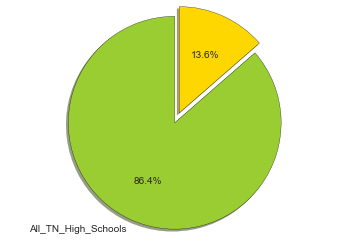

Graduation Percentage:


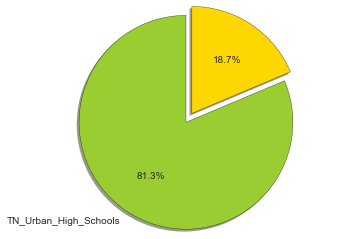

Graduation Percentage:


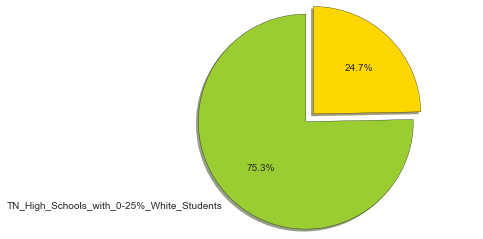

Graduation Percentage:


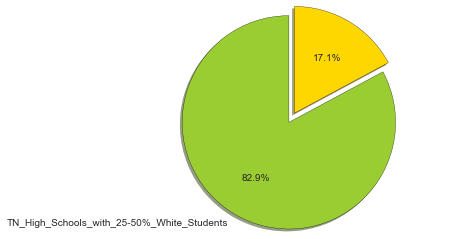

Graduation Percentage:


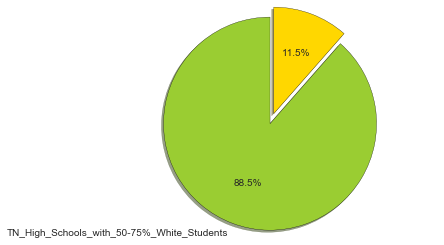

Graduation Percentage:


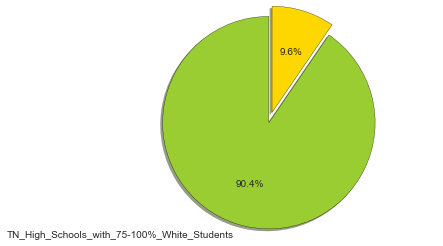

Graduation Percentage:


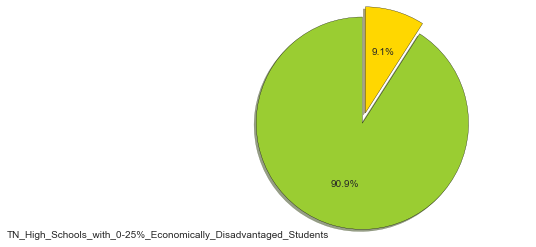

Graduation Percentage:


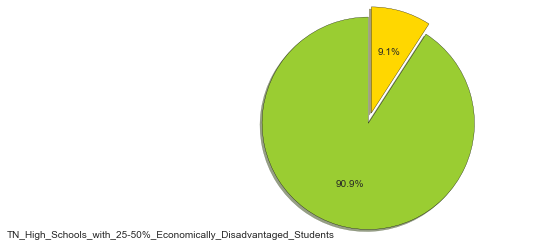

Graduation Percentage:


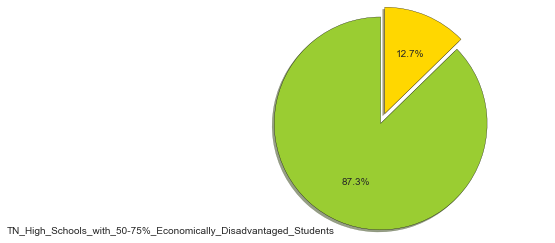

Graduation Percentage:


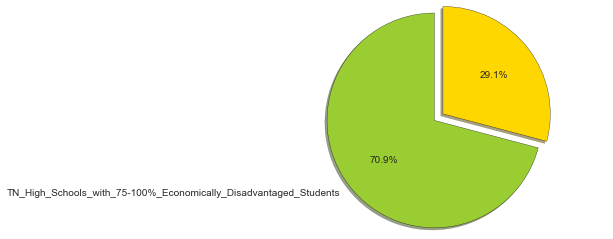

In [58]:
for i in range (0,10):
    GradPctPie(i)